In [1]:
import numpy as np

# Array Creation

In [4]:
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [6]:
b = np.zeros(5)
b

array([0., 0., 0., 0., 0.])

In [7]:
c = np.ones(5)
c

array([1., 1., 1., 1., 1.])

In [9]:
d = np.arange(0, 10, 2)
d

array([0, 2, 4, 6, 8])

In [11]:
e = np.linspace(0, 1, 5)
e

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

# Random Number Generation

In [12]:
# Seed for reproducibility
np.random.seed(42)

In [14]:
# Normal distribution
np.random.normal(0.07, 0.10, 10)

array([0.20993554, 0.16246337, 0.07596304, 0.00530632, 0.13982233,
       0.10934854, 0.15951932, 0.13351718, 0.17495527, 0.01647648])

In [15]:
# Uniform distribution
np.random.uniform(0, 1, 10)

array([0.08011485, 0.89481666, 0.54759238, 0.81729777, 0.45231828,
       0.6435777 , 0.52640266, 0.73158952, 0.08162998, 0.06035208])

In [16]:
# Binomial distribution where n=10 is 10 trials or as an example 10 coin flips, p=0.5 is the probability of success, 10 samples is the number samples 
np.random.binomial(10, 0.5, 10)

array([4, 3, 7, 4, 8, 4, 4, 6, 6, 5])

In [17]:
np.random.binomial(10, 0.5, 5)

array([5, 6, 4, 9, 8])

# Vectorized Operations

In [18]:
x = np.array([1, 2, 3])
y = x + 5
z = x * x
x, y, z

(array([1, 2, 3]), array([6, 7, 8]), array([1, 4, 9]))

Vectorized operations are crucial in simulations where you apply formulas to thousands (or millions) of trials in one shot.

# Aggregation & Summarization

In [20]:
data = np.random.normal(5, 2, 10000)
mean = np.mean(data)
std = np.std(data)
percentiles = np.percentile(data, [5, 50, 95])
histogram = np.histogram(data)
mean, std, percentiles, histogram

(5.032907842894265,
 2.016351230428019,
 array([1.68164135, 5.04100563, 8.31332165]),
 (array([   8,   53,  399, 1309, 2611, 2957, 1917,  623,  105,   18],
        dtype=int64),
  array([-3.12920629, -1.55494219,  0.01932192,  1.59358602,  3.16785012,
          4.74211422,  6.31637832,  7.89064243,  9.46490653, 11.03917063,
         12.61343473])))

# Exercises 1

### Problem 1

Simulate 1000 random values from a normal distribution with mean 2, stdev 0.5

In [26]:
prob_1 = np.random.normal(2, 0.5, 1000)
mean_1 = np.mean(prob_1)
std_1 = np.std(prob_1)
max_1 = np.max(prob_1)
min_1 = np.min(prob_1)
prob_1, mean_1, std_1, max_1, min_1

(array([1.91486407, 3.3467886 , 1.32004977, 1.47745102, 2.70224864,
        1.22176825, 2.24759022, 1.69685938, 1.19192972, 2.26342468,
        2.2781287 , 2.00069293, 3.03454447, 1.61425134, 2.43328681,
        2.16367076, 2.48576088, 1.74795659, 1.3076653 , 1.65899427,
        1.96811072, 2.34044777, 2.00864338, 2.10753851, 2.86278109,
        1.98788898, 1.73381319, 2.22016233, 1.14209218, 1.14102141,
        1.93297383, 1.5335497 , 1.69588078, 2.46738672, 2.26312247,
        1.96151248, 2.04148303, 1.78774263, 2.42467045, 2.39627089,
        2.49546642, 2.4724635 , 2.02702407, 1.65089476, 1.91634779,
        2.05831227, 1.66298673, 2.81493458, 2.81743058, 1.93996607,
        2.51544   , 2.28001076, 1.75168957, 2.20600524, 1.61287195,
        1.55999855, 2.23845171, 2.24440404, 3.34704377, 1.92226505,
        1.73551801, 2.46137711, 1.9874718 , 1.67618983, 1.70709335,
        1.91023413, 2.52722554, 2.21581299, 1.58330381, 2.91735911,
        1.54631007, 1.63133597, 2.58351335, 2.74

### Problem 2

What is the 95th percentile of those values?

In [24]:
percentile_95 = np.percentile(prob_1, 95)
percentile_95

2.82725627204642

### Problem 3

If you compound those 1000 value annually for 5 years (assume initial = 1000), what's the average final value?

In [27]:
n = 5
pv = 1000
percent = prob_1 / 100

comp = pv * ((1 + percent) ** n)
mean_comp = np.mean(comp)
mean_comp

1103.5961801183594

# Multi-Period Monte Carlo Simulation with NumPy

## Goal: Simulate the future value of an investment over multiple years (say 5), where each year has its own random return.  Do this across many simulation paths.

In [29]:
init_inv = 1000
inv_n = 5
exp_ret = 0.02
exp_stdev = 0.005
sims = 1000

In [31]:
# Creates a matrix of shape (1000, 5); each row is one simulation, and each column is a random annual return for one of the 
# five years, where we might get [0.0195, 0.0213, 0.0179, 0.0222, 0.0201]
returns_multi = np.random.normal(exp_ret, exp_stdev, (sims, inv_n))

In [33]:
growth_factors = 1 + returns_multi # each value tells you how much the investment multiplies that year
future_values = init_inv * np.prod(growth_factors, axis=1) # this does the compounding where we multiply across the 5 years for each row

# this might give us something like 1000 x 1.0195 x 1.0213 x 1.0179 x 1.0222 x 1.0201 with the result being a 1D array of 1000 future values

In [34]:
mean_fv = np.mean(future_values)
percentiles = np.percentile(future_values, [5, 50, 95])
mean_fv, percentiles

(1103.9233507977185, array([1084.51019468, 1103.53705616, 1123.33252375]))

# Visualization 1: Histogram of Final Outcomes

In [35]:
import matplotlib.pyplot as plt

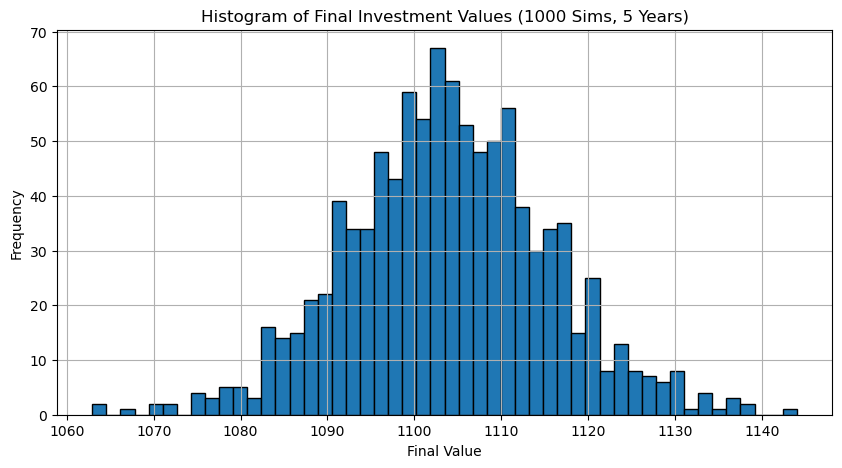

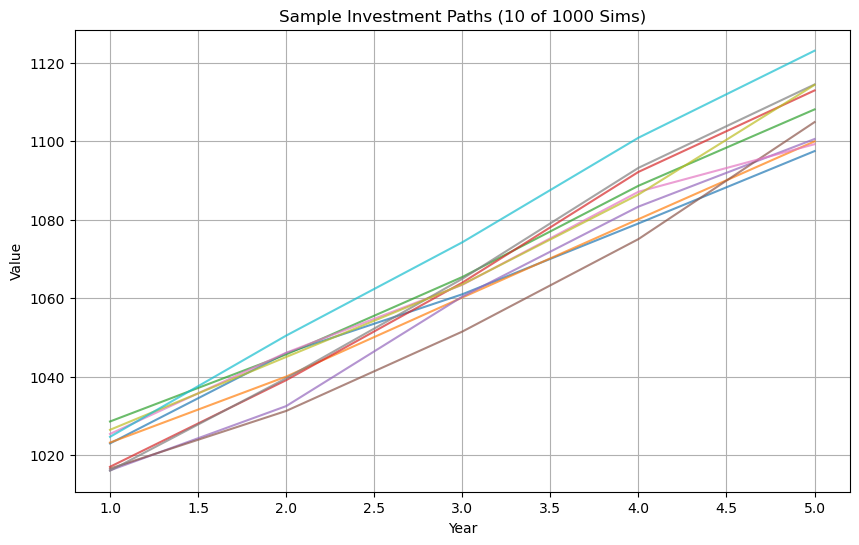

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
initial = 1000
years = 5
sims = 1000
mean = 0.02
stdev = 0.005

# Simulate random returns for each year in each simulation
returns = np.random.normal(mean, stdev, (sims, years))

# Growth factors for each year
growth_factors = 1 + returns

# Cumulative value for each simulation path over time
cumulative_growth = np.cumprod(growth_factors, axis=1)  # shape = (sims, years)
final_values = initial * cumulative_growth[:, -1]       # final value after 5 years

# 📊 Visualization 1: Histogram of Final Values
plt.figure(figsize=(10, 5))
plt.hist(final_values, bins=50, edgecolor='black')
plt.title("Histogram of Final Investment Values (1000 Sims, 5 Years)")
plt.xlabel("Final Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 📈 Visualization 2: Sample Simulation Paths
plt.figure(figsize=(10, 6))
for i in range(10):  # plot 10 random simulations
    plt.plot(np.arange(1, years+1), initial * cumulative_growth[i], alpha=0.7)
plt.title("Sample Investment Paths (10 of 1000 Sims)")
plt.xlabel("Year")
plt.ylabel("Value")
plt.grid(True)
plt.show()